In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Loading

In [2]:
df=pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


Data cleaning

In [3]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [4]:
df.describe()


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:


df.drop('id', axis = 1, inplace = True)

In [6]:
#rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

target = df[['class']]


In [7]:
categorical = df.select_dtypes(include=["object", "bool"])
categorical.head()

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
# converting necessary columns to numerical type 
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [9]:
categorical = df.select_dtypes(include=["object", "bool"])
categorical.head()

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [10]:
# finding unique values in the columns

for i in df.columns:
    print("Column:",i)
    print()
    print(set(df[i].tolist()))
    print()

Column: age

{nan, nan, nan, nan, nan, 5.0, nan, 7.0, 8.0, 4.0, 3.0, 11.0, 12.0, 6.0, 14.0, 15.0, 2.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, nan, 32.0, nan, 34.0, 35.0, 33.0, 36.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 90.0, nan, 37.0}

Column: blood_pressure

{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 140.0, 50.0, 180.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0}

Column: specific_gravity

{nan, 1.02, 1.005, 1.015, 1.01, nan, 1.025, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan}

Column: albumin

{0.0, 1.0, 2.0, 3.0, 4.0, n

In [11]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [12]:
features = df.drop(columns=["class"], axis=1)


In [13]:
# checking for null values
df.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer

catta_impute = SimpleImputer(strategy="most_frequent")

catta_data = catta_impute.fit_transform(categorical)
catta_df = pd.DataFrame(catta_data, columns=categorical.columns)

In [15]:
catta_df.head()

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [16]:
catta_df.isna().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [17]:
numericals = features.select_dtypes(include=["int", "float"])

numericals.head()


,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6


In [18]:
numericals.isna().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [19]:
num_impute = SimpleImputer(strategy="mean")

num_data = num_impute.fit_transform(numericals)
num_df = pd.DataFrame(num_data, columns=numericals.columns)

In [20]:
num_df.isna().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [21]:
cleanedDf = pd.concat([num_df, catta_df, target], axis=1)
cleanedDf.to_csv("CleanedCKDData.csv", index=False)

In [22]:
from sklearn import preprocessing

df_encode = catta_df.apply(preprocessing.LabelEncoder().fit_transform)
df_encode.shape


(400, 11)

In [23]:
X = df_encode.drop('class',axis=1)
y = df_encode['class']


In [25]:
df_encode.head()

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,1,1,0,0,1,1,1,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,1,1,1,0,1,0
3,1,0,1,0,1,0,1,1,1,1,0
4,1,1,0,0,0,0,1,0,0,0,0


In [26]:
from sklearn.feature_selection import chi2,SelectKBest
fs = SelectKBest(score_func=chi2, k=8)
X_selected=fs.fit_transform(X,y)
X_selected
df_encode=pd.DataFrame(data=X_selected, columns=['pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension','diabetes_mellitus', 'appetite', 'peda_edema', 'aanemia' ])
df_encode

,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,appetite,peda_edema,aanemia
0,1,0,0,1,1,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,1
3,0,1,0,1,0,1,1,1
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
395,1,0,0,0,0,0,0,0
396,1,0,0,0,0,0,0,0
397,1,0,0,0,0,0,0,0
398,1,0,0,0,0,0,0,0


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(num_df)
MinMax_numericdf = pd.DataFrame(scaled_data, columns=num_df.columns)
MinMax_numericdf.shape

(400, 14)

In [28]:
X = MinMax_numericdf
y = target

In [29]:
from sklearn.feature_selection import f_classif
fs=SelectKBest(score_func=f_classif,k=3)
X_selected = fs.fit_transform(X,y)

/Users/Samphel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


age                       0.056818
blood_pressure            0.000000
specific_gravity          0.750000
albumin                   0.800000
sugar                     0.000000
blood_glucose_random      0.269309
blood_urea                0.042362
serum_creatinine          0.005291
sodium                    0.839298
potassium                 0.047803
haemoglobin               0.557823
packed_cell_volume        0.644444
white_blood_cell_count    0.157025
red_blood_cell_count      0.441938
Name: 1, dtype: float64

In [30]:
MinMax_numericdf=pd.DataFrame(data=X_selected, columns=['specific_gravity', 'albumin', 'haemoglobin'])
MinMax_numericdf

,specific_gravity,albumin,haemoglobin
0,0.75,0.836735,0.777778
1,0.75,0.557823,0.644444
2,0.25,0.442177,0.488889
3,0.00,0.551020,0.511111
4,0.25,0.578231,0.577778
...,...,...,...
395,0.75,0.857143,0.844444
396,1.00,0.911565,1.000000
397,0.75,0.863946,0.888889
398,1.00,0.755102,0.933333


In [31]:
X = pd.concat([df_encode, MinMax_numericdf], axis=1)
X

,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,appetite,peda_edema,aanemia,specific_gravity,albumin,haemoglobin
0,1,0,0,1,1,0,0,0,0.75,0.836735,0.777778
1,1,0,0,0,0,0,0,0,0.75,0.557823,0.644444
2,1,0,0,0,1,1,0,1,0.25,0.442177,0.488889
3,0,1,0,1,0,1,1,1,0.00,0.551020,0.511111
4,1,0,0,0,0,0,0,0,0.25,0.578231,0.577778
...,...,...,...,...,...,...,...,...,...,...,...
395,1,0,0,0,0,0,0,0,0.75,0.857143,0.844444
396,1,0,0,0,0,0,0,0,1.00,0.911565,1.000000
397,1,0,0,0,0,0,0,0,0.75,0.863946,0.888889
398,1,0,0,0,0,0,0,0,1.00,0.755102,0.933333


In [32]:
y = target
y

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print()
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (320, 11)
y_train shape:  (320, 1)

x_test shape:  (80, 11)
y_test shape:  (80, 1)


In [34]:
from sklearn.model_selection import ShuffleSplit,GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title, color):
    
    plt.figure(figsize=(14, 12))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap=color)

    plt.title(title)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    
    plt.show()

In [36]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

print("Actual Labels:", y_test.values.tolist()[:10])
print("Predicted Labels:", pd.DataFrame(lr_pred[:10]).values.tolist()[:10])

Actual Labels: [['ckd'], ['ckd'], ['notckd'], ['notckd'], ['notckd'], ['ckd'], ['ckd'], ['ckd'], ['notckd'], ['ckd']]
Predicted Labels: [['ckd'], ['ckd'], ['notckd'], ['notckd'], ['notckd'], ['ckd'], ['ckd'], ['ckd'], ['notckd'], ['ckd']]


/Users/Samphel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


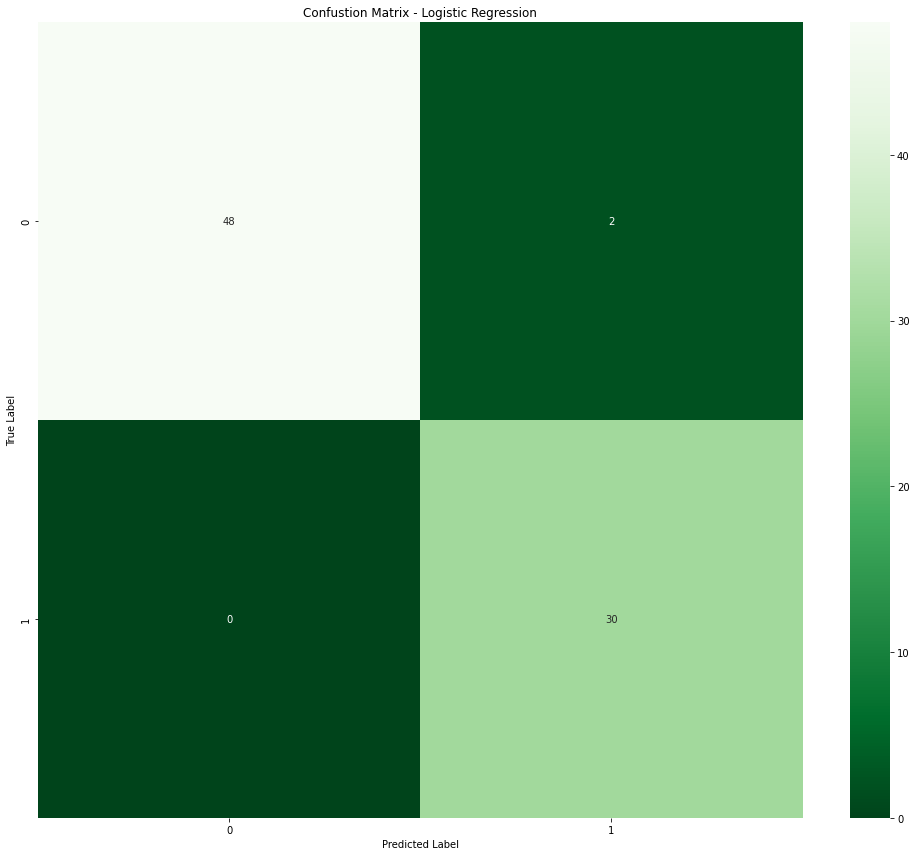

In [37]:
plot_confusion_matrix(y_test, lr_pred, "Confustion Matrix - Logistic Regression", "Greens_r")

In [38]:
# Calculate the Accuracy of the Logistic Regression
from sklearn.metrics import accuracy_score

lr_acc = round(accuracy_score(y_test, lr_pred), 4)

print("Logistic Regression Accuracy:", lr_acc)

Logistic Regression Accuracy: 0.975


In [39]:
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

# Make a prediction
knn_pred = knn.predict(x_test)

print("Actual Labels:", y_test.values.tolist()[:10])
print("Predicted Labels:", pd.DataFrame(knn_pred[:10]).values.tolist()[:10])

Actual Labels: [['ckd'], ['ckd'], ['notckd'], ['notckd'], ['notckd'], ['ckd'], ['ckd'], ['ckd'], ['notckd'], ['ckd']]
Predicted Labels: [['ckd'], ['ckd'], ['notckd'], ['notckd'], ['notckd'], ['ckd'], ['ckd'], ['ckd'], ['notckd'], ['ckd']]


/Users/Samphel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


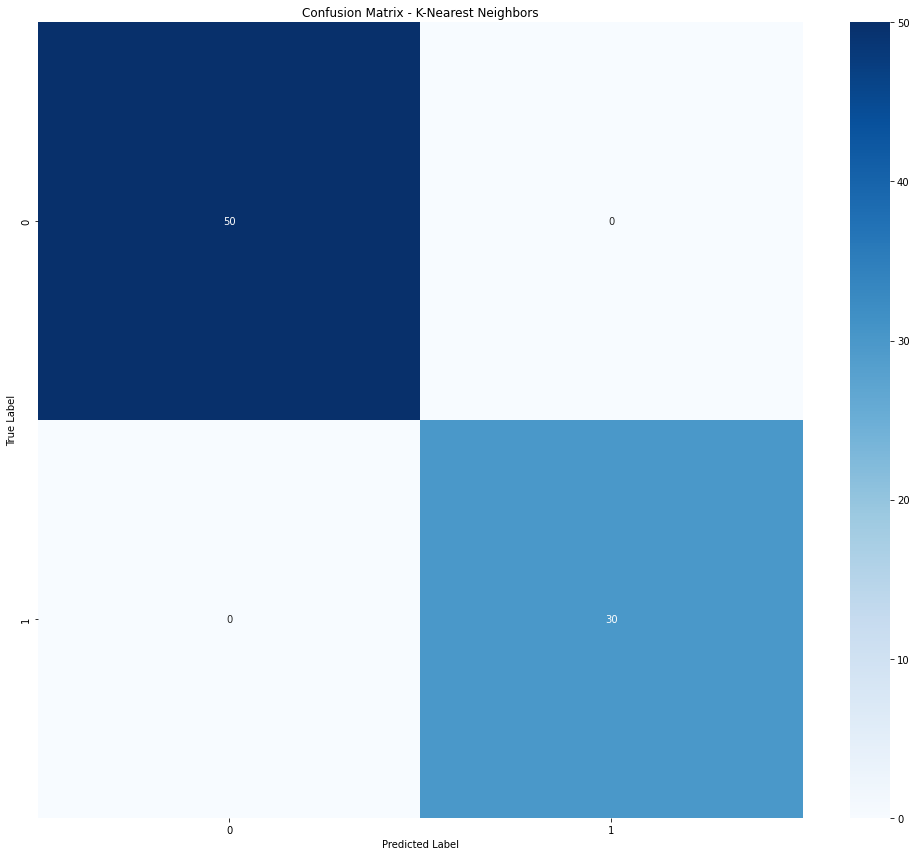

In [40]:
plot_confusion_matrix(y_test, knn_pred, "Confusion Matrix - K-Nearest Neighbors", "Blues")

In [41]:
knn_acc = round(accuracy_score(y_test, knn_pred), 4)

print("K-Nearest Neighbors Accuracy:", knn_acc)

K-Nearest Neighbors Accuracy: 1.0


In [42]:
tree = DecisionTreeClassifier()

tree.fit(x_train, y_train)

# Make a predictions
tree_pred = tree.predict(x_test)

print("Actual Labels:", y_test.values.tolist()[:10])
print("Predicted Labels:", pd.DataFrame(tree_pred[:10]).values.tolist()[:10])

Actual Labels: [['ckd'], ['ckd'], ['notckd'], ['notckd'], ['notckd'], ['ckd'], ['ckd'], ['ckd'], ['notckd'], ['ckd']]
Predicted Labels: [['ckd'], ['ckd'], ['notckd'], ['notckd'], ['notckd'], ['ckd'], ['ckd'], ['ckd'], ['notckd'], ['ckd']]


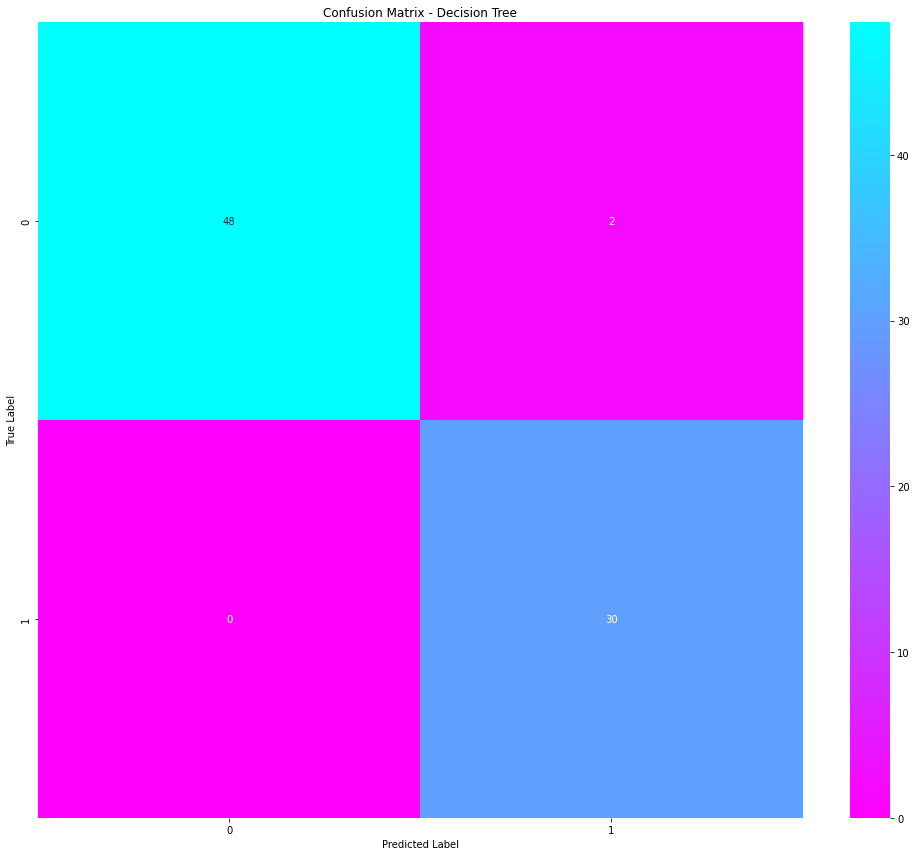

In [43]:
plot_confusion_matrix(y_test, tree_pred, "Confusion Matrix - Decision Tree", "cool_r")

In [44]:
tree_acc = round(accuracy_score(y_test, tree_pred), 4)

print("Decision Tree Accuracy:", tree_acc)

Decision Tree Accuracy: 0.975


In [45]:
svm = SVC()

svm.fit(x_train, y_train)

# Make a prediction
svm_pred = svm.predict(x_test)

print("Actual Labels:", y_test.values.tolist()[:10])
print("Predicted Labels:", pd.DataFrame(svm_pred[:10]).values.tolist()[:10])

Actual Labels: [['ckd'], ['ckd'], ['notckd'], ['notckd'], ['notckd'], ['ckd'], ['ckd'], ['ckd'], ['notckd'], ['ckd']]
Predicted Labels: [['ckd'], ['ckd'], ['notckd'], ['notckd'], ['notckd'], ['ckd'], ['ckd'], ['ckd'], ['notckd'], ['ckd']]


/Users/Samphel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


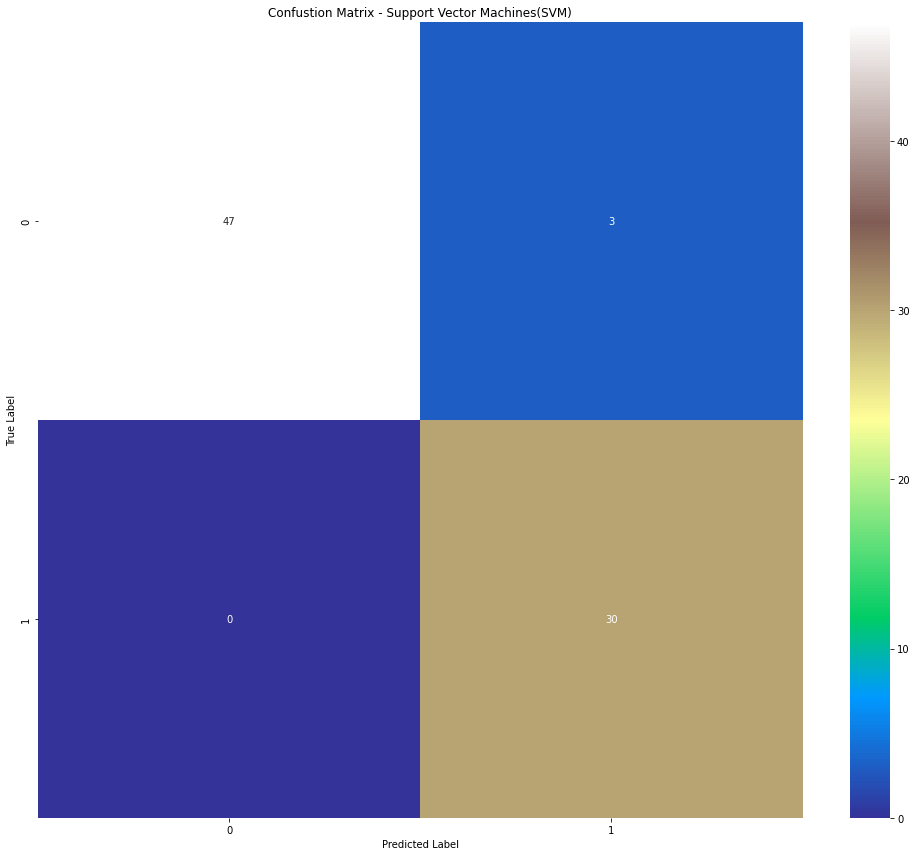

In [46]:
plot_confusion_matrix(y_test, svm_pred, "Confustion Matrix - Support Vector Machines(SVM)", "terrain")

In [47]:
svm_acc = round(accuracy_score(y_test, svm_pred), 4)

print("Support Vector Machines(SVM) Accuracy:", svm_acc)

Support Vector Machines(SVM) Accuracy: 0.9625


In [48]:

names = ["LR", "KNN", "D-Tree", "SVM"]
acc = [lr_acc, knn_acc, tree_acc, svm_acc]

models = pd.DataFrame(acc, index=names, columns=["Accuracy"])
models

,Accuracy
LR,0.9750
KNN,1.0000
D-Tree,0.9750
SVM,0.9625


In [49]:
X

,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,appetite,peda_edema,aanemia,specific_gravity,albumin,haemoglobin
0,1,0,0,1,1,0,0,0,0.75,0.836735,0.777778
1,1,0,0,0,0,0,0,0,0.75,0.557823,0.644444
2,1,0,0,0,1,1,0,1,0.25,0.442177,0.488889
3,0,1,0,1,0,1,1,1,0.00,0.551020,0.511111
4,1,0,0,0,0,0,0,0,0.25,0.578231,0.577778
...,...,...,...,...,...,...,...,...,...,...,...
395,1,0,0,0,0,0,0,0,0.75,0.857143,0.844444
396,1,0,0,0,0,0,0,0,1.00,0.911565,1.000000
397,1,0,0,0,0,0,0,0,0.75,0.863946,0.888889
398,1,0,0,0,0,0,0,0,1.00,0.755102,0.933333


With pipeline

In [50]:
# Separate the Categorical and Numerical Columns
df1=X
# Numeric columns
numeric_cols = df1.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)


# categorical columns
categorical_cols = df1.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension',
       'diabetes_mellitus', 'appetite', 'peda_edema', 'aanemia',
       'specific_gravity', 'albumin', 'haemoglobin'],
      dtype='object')
Index([], dtype='object')


In [51]:
from sklearn.pipeline import Pipeline

# Pre-Processing pipeline for Numeric Feautures
n_transformer = Pipeline(steps=
    [
        ("imputeN", SimpleImputer(strategy="mean")),
        ("scaler", MinMaxScaler()),
        ('skb',SelectKBest(score_func=f_classif,k=3))
    ]
)

n_transformer

Pipeline(steps=[('imputeN', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('skb', SelectKBest(k=3))])

In [52]:
# Pre-Processing Pipeline for Categorical Features
from sklearn.preprocessing import OneHotEncoder


c_transformer = Pipeline(steps=
    [
        ("imputeC", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
       ('skb', SelectKBest(chi2, k = 8))
    ]
)

c_transformer

Pipeline(steps=[('imputeC', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore')),
                ('skb',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7ff57129b0d0>))])

In [53]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model/estimator
lr = LogisticRegression()
lr

LogisticRegression()

In [54]:
from sklearn.compose import ColumnTransformer

pre = ColumnTransformer(transformers=
                        [
                            ("categoric", c_transformer, categorical_cols),
                            ("numeric", n_transformer, numeric_cols)
                        ]
)

pre

ColumnTransformer(transformers=[('categoric',
                                 Pipeline(steps=[('imputeC',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('skb',
                                                  SelectKBest(k=8,
                                                              score_func=<function chi2 at 0x7ff57129b0d0>))]),
                                 Index([], dtype='object')),
                                ('numeric',
                                 Pipeline(steps=[('imputeN', SimpleImputer()),
                                                 ('scaler', MinMaxScaler()),
                                                 ('skb', SelectKBest(k=3))]),
                                 Index(['pus_cell', 'pus_cell_clumps', 'bac

In [55]:
logistic_regression_model = Pipeline(steps=
                   [
                       ("preprocessing", pre),
                       ("est",lr)
                   ]
)


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(df1, target, test_size=0.2, random_state=42, stratify=target)

In [57]:
X_train.shape

(320, 11)

In [58]:
X_train.columns

Index(['pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension',
       'diabetes_mellitus', 'appetite', 'peda_edema', 'aanemia',
       'specific_gravity', 'albumin', 'haemoglobin'],
      dtype='object')

In [59]:
from sklearn import set_config
set_config(display='diagram')
logistic_regression_model.fit(X_train,y_train)


/Users/Samphel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Samphel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('skb',
                                                                   SelectKBest(k=8,
                                                                               score_func=<function chi2 at 0x7ff57129b0d0>))]),
                                                  Index([], dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('skb',
                                                                   SelectKBest(k=3))]),
                                                  Index(['pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension',
       'diabetes_mellitus', 'appetite', 'peda_edema', 'aanemia',
       'specific_gravity', 'albumin', 'haemoglobin'],
      dtype='object'))])),
                ('est', LogisticRegression())])

In [60]:
print(X_train)

     pus_cell  pus_cell_clumps  bacteria  hypertension  diabetes_mellitus  \
380         1                0         0             0                  0   
228         1                0         0             1                  0   
85          1                0         0             0                  1   
371         1                0         0             0                  0   
333         1                0         0             0                  0   
..        ...              ...       ...           ...                ...   
194         0                0         0             1                  1   
274         1                0         0             0                  0   
45          0                0         0             1                  1   
165         1                0         0             0                  1   
60          0                1         0             1                  0   

     appetite  peda_edema  aanemia  specific_gravity   albumin  haemoglobin

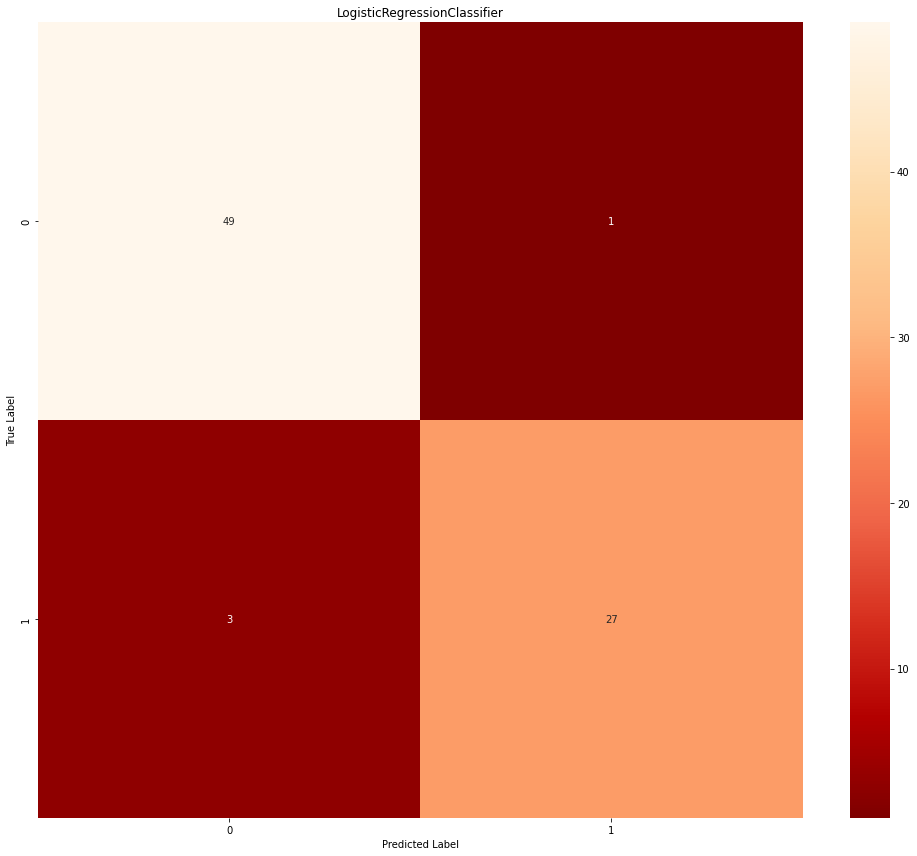

In [61]:
plot_confusion_matrix(Y_test, logistic_regression_model.predict(X_test), "LogisticRegressionClassifier", "OrRd_r")

In [62]:
from sklearn.metrics import classification_report, recall_score, f1_score, precision_score, confusion_matrix
import seaborn as sns

              precision    recall  f1-score   support

           Y       0.94      0.98      0.96        50
           N       0.96      0.90      0.93        30

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.95        80
weighted avg       0.95      0.95      0.95        80



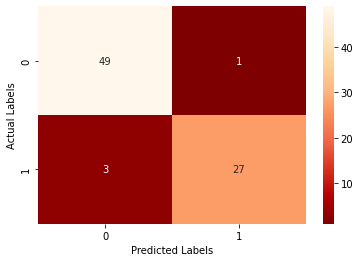

In [63]:
y_pred = logistic_regression_model.predict(X_test)

# Summarize the fit of the model
report = classification_report(Y_test, y_pred, target_names=["Y", "N"])
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='OrRd_r');

plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

plt.show()

In [64]:
# import library to save the trained ML model
import pickle

# save the model
rf_pickle = open("logistic_regression_model.pickle", "wb")
pickle.dump(lr, rf_pickle)
rf_pickle.close()

In [65]:
target

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


In [67]:
X_train


,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,appetite,peda_edema,aanemia,specific_gravity,albumin,haemoglobin
380,1,0,0,0,0,0,0,0,0.750000,0.829932,1.000000
228,1,0,0,1,0,0,0,0,0.620397,0.641254,0.664100
85,1,0,0,0,1,1,1,0,0.500000,0.462585,0.664100
371,1,0,0,0,0,0,0,0,1.000000,0.986395,0.933333
333,1,0,0,0,0,0,0,0,0.750000,0.993197,0.822222
...,...,...,...,...,...,...,...,...,...,...,...
194,0,0,0,1,1,0,0,0,0.250000,0.641254,0.664100
274,1,0,0,0,0,0,0,0,0.750000,0.768707,0.777778
45,0,0,0,1,1,1,1,0,0.750000,0.421769,0.664100
165,1,0,0,0,1,0,0,0,0.750000,0.641254,0.664100
